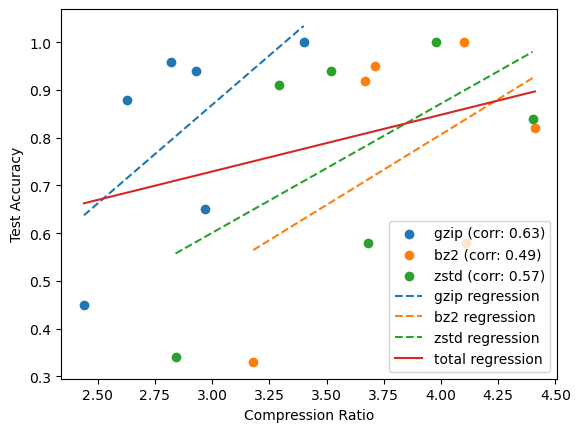

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Order: 20news, sst2, aclarc, cancer, phishing, ecommerce
cr_gzip = [2.44, 2.63, 2.97, 3.40, 2.93, 2.82]
ta_gzip = [0.45, 0.88, 0.65, 1.0, 0.94, 0.96]
cr_bz2 = [3.18, 4.41, 4.11, 4.10, 3.67, 3.71]
ta_bz2 = [0.33, 0.82, 0.58, 1.0, 0.92, 0.95]
cr_zstd = [2.84, 4.40, 3.68, 3.98, 3.29, 3.52]
ta_zstd = [0.34, 0.84, 0.58, 1.0, 0.91, 0.94]

# Calculate correlations
correlation_gzip, _ = pearsonr(cr_gzip, ta_gzip)
correlation_bz2, _ = pearsonr(cr_bz2, ta_bz2)
correlation_zstd, _ = pearsonr(cr_zstd, ta_zstd)

# Concatenate data
cr_all = cr_gzip + cr_bz2 + cr_zstd
ta_all = ta_gzip + ta_bz2 + ta_zstd

# Calculate correlation of all compressors and test accuracies
correlation_all, _ = pearsonr(cr_all, ta_all)


# Plotting
plt.scatter(cr_gzip, ta_gzip, label=f'gzip (corr: {correlation_gzip:.2f})')
plt.scatter(cr_bz2, ta_bz2, label=f'bz2 (corr: {correlation_bz2:.2f})')
plt.scatter(cr_zstd, ta_zstd, label=f'zstd (corr: {correlation_zstd:.2f})')
#plt.scatter(cr_all, ta_all, label=f'total (corr: {correlation_all:.2f})')

# Linear regression
regression_gzip = np.polyfit(cr_gzip, ta_gzip, 1)
regression_bz2 = np.polyfit(cr_bz2, ta_bz2, 1)
regression_zstd = np.polyfit(cr_zstd, ta_zstd, 1)
regression_all = np.polyfit(cr_all, ta_all, 1)

plt.plot(np.unique(cr_gzip), np.poly1d(regression_gzip)(np.unique(cr_gzip)), label='gzip regression', linestyle='--')
plt.plot(np.unique(cr_bz2), np.poly1d(regression_bz2)(np.unique(cr_bz2)), label='bz2 regression', linestyle='--')
plt.plot(np.unique(cr_zstd), np.poly1d(regression_zstd)(np.unique(cr_zstd)), label='zstd regression', linestyle='--')
plt.plot(np.unique(cr_all), np.poly1d(regression_all)(np.unique(cr_all)), label='total regression', linestyle='-')


plt.xlabel('Compression Ratio')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()
